# SVM Regressor using Wi-Fi and Bluetooth data

### Experiments which aims to explore the ML algorithm SVM as a Regression algorithm using the Wi-Fi and BLE technologies moreover using the strength of the signal as a basis.

### Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import make_pipeline
import sklearn
import scipy

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
from pandas.plotting import scatter_matrix

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

<Figure size 432x288 with 0 Axes>

### Load File
Function that allows to load a file from disk

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

### Replace 0 with Nan RSSI Values

In [3]:
def replace_features_nan(dataset):
    dataset.iloc[:,4:] = dataset.iloc[:,4:].replace(0,np.nan)
    return dataset

### Initialize Dataset

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier_university_dataset.csv')
dataset = replace_features_nan(dataset)
display(dataset)
display(dataset.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.0,-65.0,-63.0,-76.0,-78.0,-79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.0,-61.0,-62.0,-77.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.0,-62.0,-62.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.0,-61.0,-63.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.0,-61.0,-63.0,-76.0,-78.0,-78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-90.0,-89.0,NaN,NaN,NaN,-90.0,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-88.0,NaN,NaN,NaN,NaN,-90.0,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-89.0,-90.0,NaN,NaN,NaN,-90.0,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-91.0,-89.0,NaN,NaN,NaN,NaN,-93.0,-84.0,-93


(750, 37)

### Initialize Test Set (HOME | BLE)

In [5]:
test_dataset_ble  = load_file('../radiomap_home_BluetoothWiFi.csv')
test_dataset_ble  = replace_features_nan(test_dataset_ble)
display(test_dataset_ble)
display(test_dataset_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,c4:e9:84:42:ac:ff,00:06:91:d4:77:00,00:06:91:d4:77:02,8c:5b:f0:78:a1:d6,1c:ab:c0:df:99:c8,1c:ab:c0:df:99:c9,00:26:5b:d1:93:38,00:26:5b:d1:93:39,00:fc:8d:cf:98:08,00:fc:8d:cf:98:09,bc:4d:fb:52:ea:28,bc:4d:fb:52:ea:29,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,524,-2.0,0.5,-69,-68.0,-69.0,-72.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-87.0,-90.0,-83.0
1,525,-2.0,0.5,-70,-66.0,-66.0,-70.0,-73.0,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,-87.0,-76.0
2,526,-2.0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,527,-2.0,0.5,-65,-66.0,-66.0,-70.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-86.0,-87.0,-81.0
4,528,-2.0,0.5,-66,-66.0,-66.0,-71.0,NaN,-68.0,NaN,NaN,NaN,NaN,NaN,NaN,-92.0,-91.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,649,-2.0,-1.5,-65,-68.0,-68.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-76.0,NaN,-87.0,-76.0,NaN
126,650,-2.0,-1.5,-66,-67.0,-64.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-88.0,-80.0,NaN
127,651,-2.0,-1.5,-65,-68.0,-66.0,NaN,-71.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-96.0,-76.0,NaN
128,652,-2.0,-1.5,-65,-68.0,-66.0,NaN,-72.0,-71.0,-75.0,-75.0,NaN,NaN,-77.0,-79.0,-86.0,-76.0,NaN


(130, 18)

### Initialize Test Set (Home | Only BLE)

In [6]:
test_dataset_home_ble = load_file('../radiomap_home_Bluetooth.csv')
test_dataset_home_ble = replace_features_nan(test_dataset_home_ble)
display(test_dataset_home_ble)
display(test_dataset_home_ble.shape)

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,NaN
1,391,-2.0,0.5,-84,-80,NaN
2,392,-2.0,0.5,-84,-85,NaN
3,393,-2.0,0.5,-84,-84,NaN
4,394,-2.0,0.5,-90,-81,NaN
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,NaN
126,517,-2.0,-1.5,-81,-90,NaN
127,518,-2.0,-1.5,-80,-88,NaN
128,519,-2.0,-1.5,-81,-87,NaN


(130, 6)

### Dataset Overall Info

In [7]:
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fingerprint ID     750 non-null    int64  
 1   coordinate_X       750 non-null    float64
 2   coordinate_Y       750 non-null    float64
 3   zone               750 non-null    object 
 4   f0:5c:19:94:1a:40  630 non-null    float64
 5   f0:5c:19:94:1a:41  634 non-null    float64
 6   f0:5c:19:94:1a:42  635 non-null    float64
 7   34:fc:b9:18:e4:c1  189 non-null    float64
 8   34:fc:b9:18:e4:c0  145 non-null    float64
 9   34:fc:b9:18:e4:c2  178 non-null    float64
 10  f0:5c:19:94:1a:50  664 non-null    float64
 11  f0:5c:19:94:1a:51  699 non-null    float64
 12  f0:5c:19:94:1a:52  738 non-null    float64
 13  4c:ed:fb:5a:5c:0c  712 non-null    float64
 14  4c:ed:fb:5a:5c:08  682 non-null    float64
 15  f0:5c:19:94:19:e1  343 non-null    float64
 16  f0:5c:19:94:19:e2  280 non

None

### File Overall Description
Usage of describe pandas function on the dataset

In [8]:
display(dataset.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,750.0,639.980000,217.460567,265.0,452.25,639.5,826.75,1026.0
coordinate_X,750.0,0.000000,1.415157,-2.0,-1.00,0.0,1.00,2.0
coordinate_Y,750.0,1.000000,1.415157,-1.0,0.00,1.0,2.00,3.0
f0:5c:19:94:1a:40,630.0,-65.284127,3.983300,-76.0,-68.00,-65.0,-62.00,-56.0
f0:5c:19:94:1a:41,634.0,-63.529968,3.464086,-71.0,-66.00,-64.0,-62.00,-48.0
f0:5c:19:94:1a:42,635.0,-64.628346,3.965205,-76.0,-68.00,-64.0,-61.00,-56.0
34:fc:b9:18:e4:c1,189.0,-78.380952,3.702049,-86.0,-81.00,-78.0,-76.00,-70.0
34:fc:b9:18:e4:c0,145.0,-80.255172,4.808527,-92.0,-84.00,-79.0,-77.00,-71.0
34:fc:b9:18:e4:c2,178.0,-81.410112,4.828740,-92.0,-86.00,-81.0,-78.00,-70.0
f0:5c:19:94:1a:50,664.0,-78.664157,3.975435,-89.0,-81.25,-79.0,-76.00,-69.0


### % of Missing Values

In [9]:
def compute_missing_values(dataset): 
    missing_values = dataset.isnull().sum()
    missing_dataset = pd.DataFrame(missing_values,columns=['Missing Values'])
    display(missing_dataset)

In [10]:
compute_missing_values(dataset)

,Missing Values
Fingerprint ID,0
coordinate_X,0
coordinate_Y,0
zone,0
f0:5c:19:94:1a:40,120
f0:5c:19:94:1a:41,116
f0:5c:19:94:1a:42,115
34:fc:b9:18:e4:c1,561
34:fc:b9:18:e4:c0,605
34:fc:b9:18:e4:c2,572


### Overall Histogram of dataset atributes

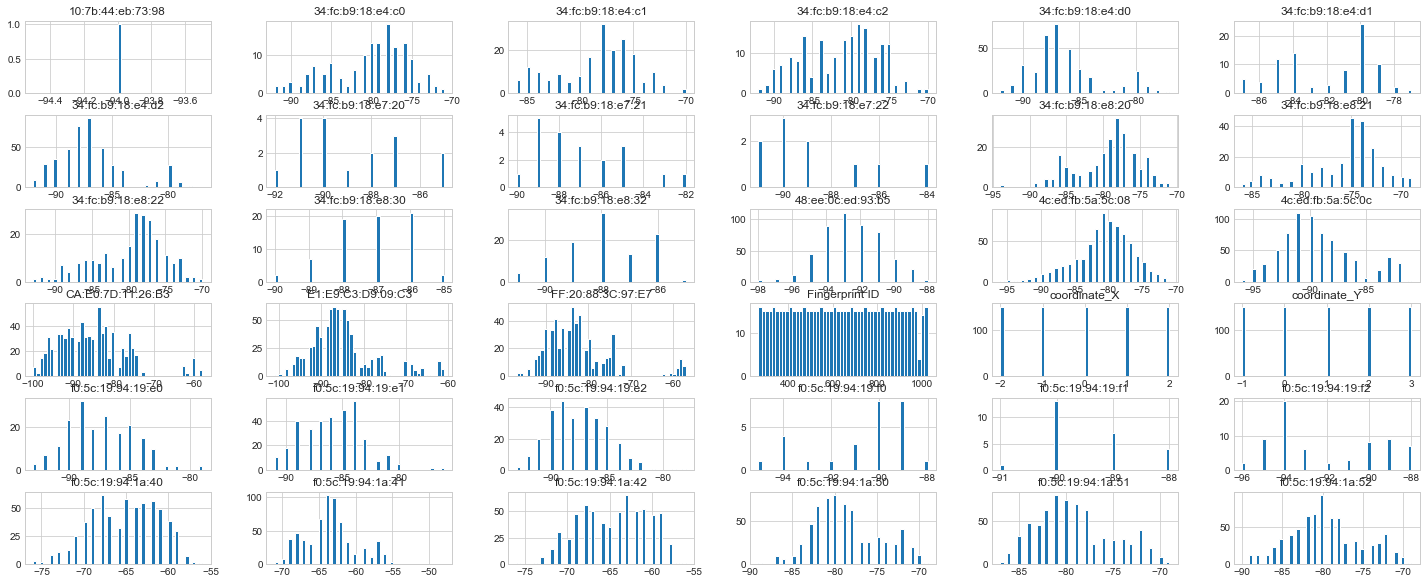

In [11]:
dataset.hist(bins=50,figsize=(25,10))
plt.show()

### Target Attribute - Reference Points
Graphical display of the reference points scanned in the experiment

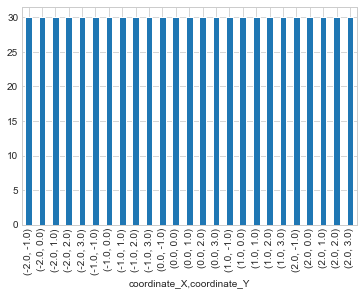

In [12]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

### Access Points Graphical Display

<BarContainer object of 30 artists>

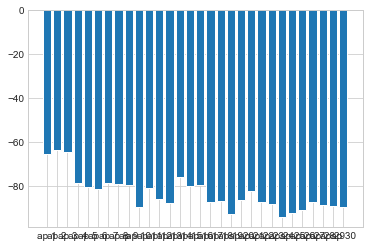

In [13]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in dataset.iloc[:,4:]:
    if ap.islower() == False:
        first_beacon_index = list(dataset.iloc[:,4:]).index(ap)
        break
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

### Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

<BarContainer object of 3 artists>

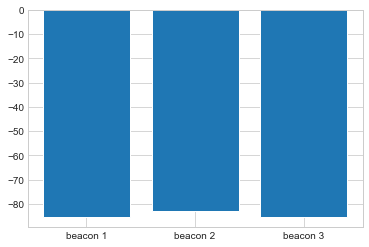

In [14]:
count_beacons = {}
counter = 1
beacons = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Wifi Signal Strength

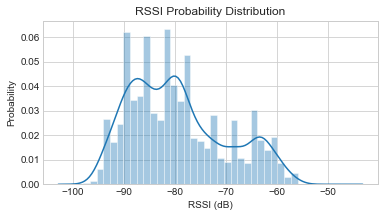

In [15]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Probability Distribution')

sns.distplot(dataset.iloc[:,4:].iloc[:,:first_beacon_index])
# The X Label
plt.xlabel('RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Bluetooth Signal Strength

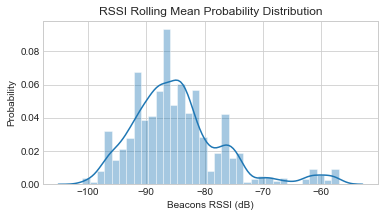

In [16]:
plt.figure(figsize=(6,3))
# Title
plt.title('RSSI Rolling Mean Probability Distribution')
# The KDE plot for the Rolling Mean column
sns.distplot(dataset.iloc[:,4:].iloc[:,first_beacon_index:])
# The X Label
plt.xlabel('Beacons RSSI (dB)')
# The Y Label
plt.ylabel('Probability')
# Show the plot
plt.show()

### Correlations
Check how much each attribute collerates with each other. Values range from -1 to 1. Close to 1 means a strong positive correlation.

In [17]:
def compute_correlations(dataset):
    corr_matrix = dataset.corr()
    display(corr_matrix)

In [18]:
compute_correlations(dataset)

,Fingerprint ID,coordinate_X,coordinate_Y,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
Fingerprint ID,1.000000,0.366251,-0.566946,0.032462,0.242338,0.033822,-0.139389,-0.117810,-0.001366,0.508888,...,NaN,0.748611,0.837234,-0.071316,-0.227020,-0.675707,-0.133456,0.109751,-0.202906,0.301147
coordinate_X,0.366251,1.000000,0.000000,0.280135,0.416280,0.287384,0.064912,0.171978,0.200114,0.225635,...,NaN,NaN,NaN,-0.623570,-0.854697,-0.919701,NaN,-0.558757,-0.413933,0.148591
coordinate_Y,-0.566946,0.000000,1.000000,0.053322,-0.071948,0.053766,0.137335,0.016277,-0.044580,-0.062025,...,NaN,0.832861,0.857329,-0.333712,-0.592749,-0.812240,NaN,-0.425166,0.318924,-0.666386
f0:5c:19:94:1a:40,0.032462,0.280135,0.053322,1.000000,0.588375,0.899034,-0.118245,-0.239832,-0.170579,0.047614,...,NaN,0.161779,0.918629,-0.361584,-0.784437,-0.523133,NaN,-0.218615,-0.134458,-0.090940
f0:5c:19:94:1a:41,0.242338,0.416280,-0.071948,0.588375,1.000000,0.617635,0.056372,-0.085792,0.000745,0.185243,...,NaN,0.344661,0.904578,-0.104510,-0.562859,-0.598961,NaN,-0.189281,-0.264925,0.156153
f0:5c:19:94:1a:42,0.033822,0.287384,0.053766,0.899034,0.617635,1.000000,-0.096208,-0.213136,-0.180547,0.080835,...,NaN,0.110221,0.866643,-0.401765,-0.649519,-0.564232,NaN,-0.213185,-0.146619,-0.086660
34:fc:b9:18:e4:c1,-0.139389,0.064912,0.137335,-0.118245,0.056372,-0.096208,1.000000,0.879276,0.859055,0.431713,...,NaN,-0.130152,0.500000,-0.693375,-0.693375,-0.993399,NaN,-0.286732,0.063276,0.238843
34:fc:b9:18:e4:c0,-0.117810,0.171978,0.016277,-0.239832,-0.085792,-0.213136,0.879276,1.000000,0.966363,0.263773,...,NaN,-0.484034,0.000000,NaN,NaN,-1.000000,-1.000000,-0.248865,-0.227294,0.249093
34:fc:b9:18:e4:c2,-0.001366,0.200114,-0.044580,-0.170579,0.000745,-0.180547,0.859055,0.966363,1.000000,0.353474,...,NaN,-0.348230,0.277350,NaN,NaN,-1.000000,NaN,-0.217113,-0.131575,0.310376
f0:5c:19:94:1a:50,0.508888,0.225635,-0.062025,0.047614,0.185243,0.080835,0.431713,0.263773,0.353474,1.000000,...,NaN,0.676457,0.766638,-0.859702,-0.795020,-0.881834,0.150109,-0.088686,-0.222276,-0.053498


### Data cleaning
Fill in missing values and fix/remove outliers

In [19]:
def compute_data_cleaning(dataset,feature):
    nan_filler = dataset[feature].min()*1.010
    dataset[feature] = dataset[feature].fillna(nan_filler) # Fill missing values

In [20]:
for x in dataset.iloc[:,4:]:
    display(x)
    compute_data_cleaning(dataset,x)
display(dataset)

'f0:5c:19:94:1a:40'

'f0:5c:19:94:1a:41'

'f0:5c:19:94:1a:42'

'34:fc:b9:18:e4:c1'

'34:fc:b9:18:e4:c0'

'34:fc:b9:18:e4:c2'

'f0:5c:19:94:1a:50'

'f0:5c:19:94:1a:51'

'f0:5c:19:94:1a:52'

'4c:ed:fb:5a:5c:0c'

'4c:ed:fb:5a:5c:08'

'f0:5c:19:94:19:e1'

'f0:5c:19:94:19:e2'

'34:fc:b9:18:e8:21'

'34:fc:b9:18:e8:22'

'34:fc:b9:18:e8:20'

'f0:5c:19:94:19:e0'

'34:fc:b9:18:e4:d2'

'48:ee:0c:ed:93:b5'

'34:fc:b9:18:e4:d0'

'34:fc:b9:18:e4:d1'

'34:fc:b9:18:e8:30'

'34:fc:b9:18:e8:32'

'10:7b:44:eb:73:98'

'f0:5c:19:94:19:f2'

'f0:5c:19:94:19:f0'

'34:fc:b9:18:e7:21'

'34:fc:b9:18:e7:22'

'34:fc:b9:18:e7:20'

'f0:5c:19:94:19:f1'

'E1:E9:C3:D9:09:C3'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

,Fingerprint ID,coordinate_X,coordinate_Y,zone,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,265,1.0,3.0,Personal,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,266,1.0,3.0,Personal,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,267,1.0,3.0,Personal,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,268,1.0,3.0,Personal,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,269,1.0,3.0,Personal,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,1022,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,1023,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,1024,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,1025,2.0,3.0,Personal,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


In [21]:
first_beacon_index_test_dataset = -1
for ap in test_dataset_ble.iloc[:,3:]:
    if ap.islower() == False:
        first_beacon_index_test_dataset = list(test_dataset_ble.iloc[:,3:]).index(ap)
        break
display("BEACON INDEX")
display(first_beacon_index_test_dataset)

'BEACON INDEX'

12

In [22]:
test_Y = test_dataset_ble[['coordinate_X','coordinate_Y']]
display(test_Y)
test_dataset_ble = test_Y.join(test_dataset_ble.iloc[:,3:].iloc[:,first_beacon_index_test_dataset:])
display(test_dataset_ble)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


,coordinate_X,coordinate_Y,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-2.0,0.5,-87.0,-90.0,-83.0
1,-2.0,0.5,-88.0,-87.0,-76.0
2,-2.0,0.5,NaN,NaN,NaN
3,-2.0,0.5,-86.0,-87.0,-81.0
4,-2.0,0.5,-92.0,-91.0,NaN
...,...,...,...,...,...
125,-2.0,-1.5,-87.0,-76.0,NaN
126,-2.0,-1.5,-88.0,-80.0,NaN
127,-2.0,-1.5,-96.0,-76.0,NaN
128,-2.0,-1.5,-86.0,-76.0,NaN


In [23]:
for x in test_dataset_ble:
    display(x)
    compute_data_cleaning(test_dataset_ble,x)
display(test_dataset_ble)

'coordinate_X'

'coordinate_Y'

'FF:20:88:3C:97:E7'

'CA:E0:7D:11:26:B3'

'E1:E9:C3:D9:09:C3'

,coordinate_X,coordinate_Y,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-2.0,0.5,-87.0,-90.00,-83.00
1,-2.0,0.5,-88.0,-87.00,-76.00
2,-2.0,0.5,-101.0,-94.94,-86.86
3,-2.0,0.5,-86.0,-87.00,-81.00
4,-2.0,0.5,-92.0,-91.00,-86.86
...,...,...,...,...,...
125,-2.0,-1.5,-87.0,-76.00,-86.86
126,-2.0,-1.5,-88.0,-80.00,-86.86
127,-2.0,-1.5,-96.0,-76.00,-86.86
128,-2.0,-1.5,-86.0,-76.00,-86.86


In [24]:
for x in test_dataset_home_ble.iloc[:,3:]:
    display(x)
    compute_data_cleaning(test_dataset_home_ble,x)
display(test_dataset_home_ble)

'CA:E0:7D:11:26:B3'

'FF:20:88:3C:97:E7'

'E1:E9:C3:D9:09:C3'

,Fingerprint ID,coordinate_X,coordinate_Y,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,390,-2.0,0.5,-92,-81,-88.88
1,391,-2.0,0.5,-84,-80,-88.88
2,392,-2.0,0.5,-84,-85,-88.88
3,393,-2.0,0.5,-84,-84,-88.88
4,394,-2.0,0.5,-90,-81,-88.88
...,...,...,...,...,...,...
125,516,-2.0,-1.5,-80,-88,-88.88
126,517,-2.0,-1.5,-81,-90,-88.88
127,518,-2.0,-1.5,-80,-88,-88.88
128,519,-2.0,-1.5,-81,-87,-88.88


### Initialize Training Data
Training Data intialization for predictions purposes

In [25]:
train_wifi = dataset.iloc[:,4:first_beacon_index]
display(train_wifi)
display(train_wifi.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,f0:5c:19:94:19:e0,34:fc:b9:18:e4:d2,48:ee:0c:ed:93:b5,34:fc:b9:18:e4:d0,34:fc:b9:18:e4:d1,34:fc:b9:18:e8:30,34:fc:b9:18:e8:32,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-87.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-93.93,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-88.00,-92.92,-98.98,-92.92,-87.87,-90.9,-91.91,-94.94,-96.96,-95.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-93.93,-86.00,-98.98,-86.00,-87.87,-90.9,-91.91,-94.94,-90.00,-89.00
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-93.93,-86.00,-92.00,-86.00,-86.00,-90.9,-91.91,-94.94,-88.00,-95.95
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-93.93,-87.00,-93.00,-88.00,-87.87,-90.9,-91.91,-94.94,-89.00,-90.00
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-93.93,-85.00,-92.00,-86.00,-85.00,-90.9,-91.91,-94.94,-91.00,-89.00


(750, 26)

In [26]:
train_ble = dataset.iloc[:,4:].iloc[:,first_beacon_index:]
display(train_ble)
display(train_ble.shape)

,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-86.0,-88.0,-96
1,-96.0,-88.0,-96
2,-94.0,-92.0,-98
3,-92.0,-89.0,-96
4,-96.0,-89.0,-93
...,...,...,...
745,-95.0,-84.0,-95
746,-94.0,-83.0,-92
747,-92.0,-84.0,-91
748,-93.0,-84.0,-93


(750, 3)

In [27]:
X_train = dataset.iloc[:,4:]
display(X_train)
display(X_train.shape)
train_Y = dataset.iloc[:,1:3]
display(train_Y)
display(train_Y.shape)

,f0:5c:19:94:1a:40,f0:5c:19:94:1a:41,f0:5c:19:94:1a:42,34:fc:b9:18:e4:c1,34:fc:b9:18:e4:c0,34:fc:b9:18:e4:c2,f0:5c:19:94:1a:50,f0:5c:19:94:1a:51,f0:5c:19:94:1a:52,4c:ed:fb:5a:5c:0c,...,10:7b:44:eb:73:98,f0:5c:19:94:19:f2,f0:5c:19:94:19:f0,34:fc:b9:18:e7:21,34:fc:b9:18:e7:22,34:fc:b9:18:e7:20,f0:5c:19:94:19:f1,E1:E9:C3:D9:09:C3,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3
0,-62.00,-65.00,-63.00,-76.00,-78.00,-79.00,-80.0,-80.0,-80.0,-89.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-86.0,-88.0,-96
1,-62.00,-61.00,-62.00,-77.00,-78.00,-78.00,-80.0,-81.0,-80.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-88.0,-96
2,-63.00,-62.00,-62.00,-86.86,-92.92,-92.92,-80.0,-79.0,-80.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-94.0,-92.0,-98
3,-63.00,-61.00,-63.00,-86.86,-92.92,-92.92,-81.0,-81.0,-81.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-92.0,-89.0,-96
4,-63.00,-61.00,-63.00,-76.00,-78.00,-78.00,-80.0,-80.0,-81.0,-90.0,...,-94.94,-96.96,-95.95,-90.9,-91.91,-92.92,-91.91,-96.0,-89.0,-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-71.0,-73.0,-73.0,-83.0,...,-94.94,-90.00,-89.00,-90.9,-91.91,-92.92,-90.00,-95.0,-84.0,-95
746,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-74.0,-73.0,-83.0,...,-94.94,-88.00,-95.95,-90.9,-91.91,-92.92,-90.00,-94.0,-83.0,-92
747,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-72.0,-73.0,-73.0,-83.0,...,-94.94,-89.00,-90.00,-90.9,-91.91,-92.92,-90.00,-92.0,-84.0,-91
748,-76.76,-71.71,-76.76,-86.86,-92.92,-92.92,-74.0,-72.0,-73.0,-83.0,...,-94.94,-91.00,-89.00,-90.9,-91.91,-92.92,-91.91,-93.0,-84.0,-93


(750, 33)

,coordinate_X,coordinate_Y
0,1.0,3.0
1,1.0,3.0
2,1.0,3.0
3,1.0,3.0
4,1.0,3.0
...,...,...
745,2.0,3.0
746,2.0,3.0
747,2.0,3.0
748,2.0,3.0


(750, 2)

### Initialize Test Data

In [28]:
test_ble_X = test_dataset_ble.iloc[:,2:]
display(test_ble_X)
display(test_ble_X.shape)
test_ble_Y = test_dataset_ble.iloc[:,0:2]
display(test_ble_Y)
display(test_ble_Y.shape)

,FF:20:88:3C:97:E7,CA:E0:7D:11:26:B3,E1:E9:C3:D9:09:C3
0,-87.0,-90.00,-83.00
1,-88.0,-87.00,-76.00
2,-101.0,-94.94,-86.86
3,-86.0,-87.00,-81.00
4,-92.0,-91.00,-86.86
...,...,...,...
125,-87.0,-76.00,-86.86
126,-88.0,-80.00,-86.86
127,-96.0,-76.00,-86.86
128,-86.0,-76.00,-86.86


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

In [29]:
test_ble_home_X = test_dataset_home_ble.iloc[:,3:]
display(test_ble_home_X)
display(test_ble_home_X.shape)
test_ble_home_Y = test_dataset_home_ble.iloc[:,1:3]
display(test_ble_home_Y)
display(test_ble_home_Y.shape)

,CA:E0:7D:11:26:B3,FF:20:88:3C:97:E7,E1:E9:C3:D9:09:C3
0,-92,-81,-88.88
1,-84,-80,-88.88
2,-84,-85,-88.88
3,-84,-84,-88.88
4,-90,-81,-88.88
...,...,...,...
125,-80,-88,-88.88
126,-81,-90,-88.88
127,-80,-88,-88.88
128,-81,-87,-88.88


(130, 3)

,coordinate_X,coordinate_Y
0,-2.0,0.5
1,-2.0,0.5
2,-2.0,0.5
3,-2.0,0.5
4,-2.0,0.5
...,...,...
125,-2.0,-1.5
126,-2.0,-1.5
127,-2.0,-1.5
128,-2.0,-1.5


(130, 2)

### Dealing with Categorical Data
Using Hot-Encoder or Label Encoder to convert text/categorical data into numerical data. ML algorithms prefer it

In [30]:
label_encoder = LabelEncoder()
def compute_encoder(categorical_data,flag):
    if flag == 0:
        labels = label_encoder.fit_transform(categorical_data)
    else:
        labels = label_encoder.transform(categorical_data)
    return labels

In [31]:
categorical_zone = dataset[['zone']]
print("Previous Categorical Data")
display(categorical_zone)
zone_changed = compute_encoder(categorical_zone,0)
print("After One Hot Encoder")
dataset['labels'] = zone_changed

Previous Categorical Data


,zone
0,Personal
1,Personal
2,Personal
3,Personal
4,Personal
...,...
745,Personal
746,Personal
747,Personal
748,Personal


After One Hot Encoder


D:\Programs\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Initialize Hyperparameters for tunning

In [32]:
default_groups = dataset["coordinate_X"].map(str)+","+dataset["coordinate_Y"].map(str)
#SVM Configurable Arrays
scaler = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
C_parameter_list = [0.25,0.5,1.0,10.0,100.0,1000.0] 
kernel_list = ("linear","poly","rbf","sigmoid")
gamma_list = [10,100,"scale","auto"]
epsilon_list = [0.1,0.2,0.3]
svc_basic = SVR()
print("DEFAULT HYPERPARAMETERS")
default_params = svc_basic.get_params()
display(pd.DataFrame(default_params,index=[1]))

DEFAULT HYPERPARAMETERS


,C,cache_size,coef0,degree,epsilon,gamma,kernel,max_iter,shrinking,tol,verbose
1,1.0,200,0.0,3,0.1,scale,rbf,-1,True,0.001,False


### Statistics Output Format
Structure of the statistical output of each call to the SVM Classification Function

In [33]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

### Feature Selection
Check strength of features using ensemble algorithm Random Forest

Feature Selection Computation


array([2.81269056e-02, 1.84651480e-02, 2.45044865e-02, 6.20554607e-04,
       5.79759450e-04, 5.20730376e-04, 4.23647786e-02, 3.42044732e-02,
       3.37060691e-02, 5.48990537e-02, 2.57723943e-02, 9.46695910e-03,
       6.82857654e-03, 9.11990304e-04, 8.34125982e-04, 1.08417065e-03,
       1.06198491e-03, 1.44098225e-02, 1.88229695e-02, 1.59949148e-02,
       2.51618450e-03, 1.61104841e-03, 6.32740207e-03, 0.00000000e+00,
       5.76477107e-03, 1.62855034e-04, 6.22638429e-06, 1.24741533e-04,
       1.48366750e-05, 2.40994372e-04, 1.82994189e-01, 1.48412108e-01,
       3.18644776e-01])

CA:E0:7D:11:26:B3    0.318645
E1:E9:C3:D9:09:C3    0.182994
FF:20:88:3C:97:E7    0.148412
4c:ed:fb:5a:5c:0c    0.054899
f0:5c:19:94:1a:50    0.042365
f0:5c:19:94:1a:51    0.034204
f0:5c:19:94:1a:52    0.033706
f0:5c:19:94:1a:40    0.028127
4c:ed:fb:5a:5c:08    0.025772
f0:5c:19:94:1a:42    0.024504
48:ee:0c:ed:93:b5    0.018823
f0:5c:19:94:1a:41    0.018465
34:fc:b9:18:e4:d0    0.015995
34:fc:b9:18:e4:d2    0.014410
f0:5c:19:94:19:e1    0.009467
f0:5c:19:94:19:e2    0.006829
34:fc:b9:18:e8:32    0.006327
f0:5c:19:94:19:f2    0.005765
34:fc:b9:18:e4:d1    0.002516
34:fc:b9:18:e8:30    0.001611
34:fc:b9:18:e8:20    0.001084
f0:5c:19:94:19:e0    0.001062
34:fc:b9:18:e8:21    0.000912
34:fc:b9:18:e8:22    0.000834
34:fc:b9:18:e4:c1    0.000621
34:fc:b9:18:e4:c0    0.000580
34:fc:b9:18:e4:c2    0.000521
f0:5c:19:94:19:f1    0.000241
f0:5c:19:94:19:f0    0.000163
34:fc:b9:18:e7:22    0.000125
34:fc:b9:18:e7:20    0.000015
34:fc:b9:18:e7:21    0.000006
10:7b:44:eb:73:98    0.000000
dtype: flo

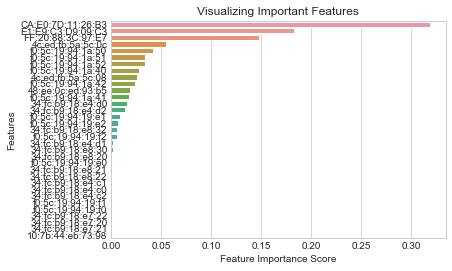

In [34]:
print("Feature Selection Computation")
random_forest_estimator = RandomForestRegressor()
main_estimator = make_pipeline(StandardScaler(),random_forest_estimator)
main_estimator.fit(X_train,train_Y)
display(random_forest_estimator.feature_importances_)
feature_imp = pd.Series(random_forest_estimator.feature_importances_,index=X_train.columns).sort_values(ascending=False)
display(feature_imp)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Training and Evaluation - SVM Regression Model

In [35]:
def compute_SVR(flag=0,trainX_data = None, trainY_data = None,testX_data = None,testY_data = None, scaler = None,
                            cross_validation = None,C_parameter = 1.0, kernel_parameter='rbf', gamma_parameter="scale",
                epsilon_value =0.1):
    # Init the Linear Regressor Estimator
    svr_estimator = SVR(C=C_parameter,kernel=kernel_parameter,gamma=gamma_parameter,epsilon=epsilon_value)
    wrapper = MultiOutputRegressor(svr_estimator)
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,wrapper)
    else:
        main_estimator = wrapper
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_groups)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

### Experiments

#### Check Training model with no cross validation
Use SVM Classifier to check the results on the training data alone

In [36]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    result = compute_SVR(flag=1,trainX_data=trainX_data,trainY_data=train_Y,
                                   testX_data=trainX_data,testY_data=train_Y,
                                   scaler=StandardScaler())
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.422277,0.336600,0.580173,0.398113,0.141310,0.277081,0.486067,1.248097,0.004054,2.459816,0.915850,Both
0,0.646143,0.867078,0.931170,0.670952,0.141586,0.389225,0.798486,2.150344,0.012854,3.332767,0.783231,WiFi
1,0.859915,1.201075,1.095936,0.679880,0.257225,0.737988,1.123793,2.162249,0.002007,3.041485,0.699731,BLE


#### Experiment - SVM with StratifiedKFold
Experiment using cross validation approach of StratifiedKFold

In [37]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','folds','type']
types = ['WiFi','BLE','Both']
cross_validation_list = np.arange(2,11)
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    for cv in cross_validation_list:
        result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = cv)  
        result.append(cv)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds,type
14,1.371245,2.423653,1.556809,0.737608,0.866732,1.332863,1.758531,2.697567,0.017696,3.328808,0.394087,7,BLE
17,1.380157,2.382994,1.543695,0.691952,0.905662,1.321299,1.706112,2.670143,0.012151,3.457951,0.404251,10,BLE
15,1.402050,2.524286,1.588800,0.747855,0.858808,1.356395,1.810023,2.715232,0.032382,3.480190,0.368928,8,BLE
16,1.462555,2.652672,1.628703,0.717141,0.967305,1.403187,1.814036,2.746709,0.069369,3.454106,0.336832,9,BLE
11,1.485731,2.714604,1.647605,0.712659,0.998149,1.448169,1.890521,2.716370,0.019169,3.537349,0.321349,4,BLE
13,1.629205,3.190467,1.786188,0.732716,1.121016,1.550934,1.989470,3.085073,0.136686,3.518913,0.202383,6,BLE
12,1.719693,3.716738,1.927884,0.872013,1.132047,1.525034,2.035042,3.556597,0.103861,4.378730,0.070816,5,BLE
26,1.821460,4.233361,2.057513,0.957531,1.080755,1.738565,2.441951,3.523415,0.045884,4.249840,-0.058340,10,Both
10,1.853760,4.263853,2.064910,0.910237,1.197485,1.638333,2.181722,3.967604,0.156883,4.386065,-0.065963,3,BLE
25,1.869908,4.399717,2.097550,0.950982,1.077427,1.924654,2.437379,3.488362,0.032576,4.379797,-0.099929,9,Both


Number of Folds:  7


#### Experiment - SVM with HoldOut
Experiment using cross validation approach of HoldOut (Train test split)

In [38]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','test_size','type']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train  
    for size in test_sizes:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = size, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
        result.append(size)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size,type
19,0.591948,0.555263,0.745160,0.454131,0.260564,0.472496,0.720014,1.615989,0.013032,2.109473,0.861184,0.2,Both
18,0.600707,0.588232,0.766963,0.480059,0.260116,0.434213,0.720154,1.635754,0.014347,1.812525,0.852942,0.1,Both
20,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,0.032241,2.684784,0.848002,0.3,Both
21,0.654353,0.656053,0.809971,0.478160,0.275950,0.550248,0.820569,1.657975,0.016590,2.714813,0.835987,0.4,Both
22,0.712275,0.795058,0.891660,0.537115,0.292397,0.577976,0.896890,1.774801,0.006295,3.004650,0.801235,0.5,Both
23,0.750912,0.860659,0.927717,0.545391,0.316376,0.620629,0.923388,1.802552,0.020835,2.947136,0.784835,0.6,Both
1,0.805176,1.179147,1.085885,0.731027,0.267438,0.558011,1.010048,2.443201,0.024125,3.190389,0.705213,0.2,WiFi
24,0.830934,1.013320,1.006638,0.568757,0.382649,0.731030,1.054008,1.900266,0.032377,3.049214,0.746670,0.7,Both
2,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,0.021364,3.203796,0.692503,0.3,WiFi
0,0.867980,1.327454,1.152152,0.762773,0.247810,0.608335,1.018322,2.552341,0.088233,3.061245,0.668137,0.1,WiFi


#### Experiment - SVM with Leave One Group Out
Experiment using cross validation approach of Leave One Group Out

In [39]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
1,1.426960,2.521963,1.588069,0.697422,0.940499,1.352524,1.731988,2.869481,0.115783,3.415624,0.369509,BLE
2,1.926129,4.384061,2.093815,0.821577,1.300403,2.016191,2.483479,3.057726,0.048384,3.787182,-0.096015,Both
0,2.316331,6.314279,2.512823,0.974760,1.693205,2.313029,2.906187,3.783176,0.028187,4.768880,-0.578570,WiFi


#### Evaluation Model Cross-Validation Experiment - Best cross-validation technique
Best parameters found using SVM

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method,type
7,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,0.032241,2.684784,0.848002,HoldOut,Both
8,0.642021,0.700461,0.836935,0.537266,0.263505,0.493846,0.775380,1.804714,0.003024,3.299728,0.824885,Stratified K-Fold,Both
1,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,0.021364,3.203796,0.692503,HoldOut,WiFi
2,0.849857,1.290862,1.136161,0.754563,0.263468,0.611487,1.067995,2.564249,0.008625,3.652963,0.677284,Stratified K-Fold,WiFi
5,0.912662,1.305021,1.142375,0.687531,0.323558,0.786788,1.192734,2.235874,0.005373,3.207102,0.673745,Stratified K-Fold,BLE
4,0.929088,1.353754,1.163510,0.701955,0.299233,0.817827,1.257105,2.189854,0.021257,2.996865,0.661561,HoldOut,BLE
3,1.426960,2.521963,1.588069,0.697422,0.940499,1.352524,1.731988,2.869481,0.115783,3.415624,0.369509,LOO,BLE
6,1.926129,4.384061,2.093815,0.821577,1.300403,2.016191,2.483479,3.057726,0.048384,3.787182,-0.096015,LOO,Both
0,2.316331,6.314279,2.512823,0.974760,1.693205,2.313029,2.906187,3.783176,0.028187,4.768880,-0.578570,LOO,WiFi


Selected cross validation method:  HoldOut


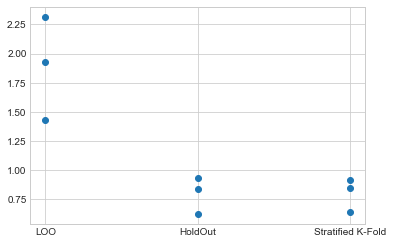

In [40]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    holdout = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler())
    cv = LeaveOneGroupOut()
    splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
    loo = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    loo.append('LOO')
    loo.append(feature)
    results.append(loo)
    holdout.append('HoldOut')
    holdout.append(feature)
    results.append(holdout)
    skf = StratifiedKFold(n_splits=selected_fold)
    splited = skf.split(trainX_data,default_groups)
    skfold = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited)  
    skfold.append('Stratified K-Fold')
    skfold.append(feature)
    results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'],'o')
selected_method = statistics.sort_values(by=['mae'])['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

#### Experiment - Best preprocessing technique
Experiment with the different preprocessing techniques

In [41]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for preprocess in scaler:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=preprocess,cross_validation = splited)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=preprocess)
        if(preprocess is None):
            regex = 'None'
        else:
            regex = re.search('(\w+)\(',str(preprocess)).group(1)
        result.append(regex)
        result.append(preprocess)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc,type
8,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,0.032241,2.684784,0.848002,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",Both
9,0.696188,0.726497,0.852348,0.492848,0.316284,0.603483,0.905517,1.675952,0.024790,2.833765,0.818376,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",Both
10,0.720756,0.797490,0.893023,0.528433,0.307890,0.621513,0.872224,1.795578,0.032857,3.237800,0.800628,MaxAbsScaler,MaxAbsScaler(copy=True),Both
0,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,0.021364,3.203796,0.692503,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",WiFi
11,0.846826,1.048151,1.023792,0.576640,0.371462,0.694630,1.088621,1.895100,0.079959,3.292982,0.737962,None,None,Both
7,0.927025,1.350085,1.161931,0.702068,0.297245,0.813102,1.246803,2.230724,0.026328,2.961237,0.662479,None,None,BLE
5,0.928134,1.347876,1.160980,0.699009,0.294130,0.805247,1.252245,2.212063,0.027223,2.906674,0.663031,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",BLE
4,0.929088,1.353754,1.163510,0.701955,0.299233,0.817827,1.257105,2.189854,0.021257,2.996865,0.661561,StandardScaler,"StandardScaler(copy=True, with_mean=True, with...",BLE
6,0.929254,1.351371,1.162485,0.700026,0.299485,0.806604,1.244134,2.228623,0.031803,2.930042,0.662157,MaxAbsScaler,MaxAbsScaler(copy=True),BLE
1,0.935273,1.450758,1.204474,0.760654,0.312711,0.737893,1.162310,2.531325,0.034621,3.155155,0.637310,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))",WiFi


Selected Preprocessing:  StandardScaler


#### Experiment - Running the SVR function with the different kernels

In [42]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','kernel','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for kernel in kernel_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                kernel_parameter=kernel)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                kernel_parameter=kernel)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,
                                                                                        stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),kernel_parameter=kernel)
        result.append(kernel)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_kernel = statistics.sort_values(by=['mae'])['kernel'].head(1).values[0]
print("Selected Kernel: ",selected_kernel)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,kernel,type
10,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,0.032241,2.684784,0.848002,rbf,Both
2,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,0.021364,3.203796,0.692503,rbf,WiFi
6,0.929088,1.353754,1.163510,0.701955,0.299233,0.817827,1.257105,2.189854,0.021257,2.996865,0.661561,rbf,BLE
9,0.977183,1.374862,1.172545,0.649500,0.414162,0.868193,1.308098,2.086484,0.051932,3.123069,0.656284,poly,Both
8,0.997029,1.322441,1.149974,0.574317,0.474018,0.932313,1.328243,2.018072,0.060558,2.335183,0.669390,linear,Both
1,1.200022,2.284088,1.511320,0.920763,0.530770,0.894352,1.663693,2.725272,0.071109,6.109760,0.428978,poly,WiFi
4,1.258472,2.129641,1.459329,0.740490,0.682084,1.109202,1.641454,2.555274,0.094266,4.404068,0.467590,linear,BLE
0,1.333557,2.431051,1.559183,0.809686,0.680462,1.192229,1.758618,2.777728,0.057943,5.406354,0.392237,linear,WiFi
5,1.387983,2.320047,1.523170,0.628733,0.931688,1.414863,1.850444,2.282500,0.078702,2.991692,0.419988,poly,BLE
11,2.241770,8.339707,2.887855,1.824547,1.026849,1.672475,2.370438,6.432160,0.091151,9.377520,-1.084927,sigmoid,Both


Selected Kernel:  rbf


#### Experiment - Running the SVR function with the different C parameters

In [43]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','C_parameter','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for C_param in C_parameter_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 C_parameter=C_param)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 C_parameter=C_param)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),C_parameter=C_param)
        result.append(C_param)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_c_parameter = statistics.sort_values(by=['mae'])['C_parameter'].head(1).values[0]
print("Selected C Parameter: ",selected_c_parameter)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,C_parameter,type
15,0.514154,0.425657,0.652424,0.402521,0.208237,0.426349,0.635916,1.365477,0.005574,2.308895,0.893586,10.00,Both
16,0.548958,0.490200,0.700143,0.435532,0.235338,0.454162,0.649247,1.488661,0.028893,2.388156,0.877450,100.00,Both
17,0.564175,0.519193,0.720550,0.449217,0.240114,0.477425,0.662460,1.536986,0.062585,2.397997,0.870202,1000.00,Both
14,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,0.032241,2.684784,0.848002,1.00,Both
4,0.675403,0.829787,0.910926,0.612605,0.286575,0.465468,0.768632,1.939664,0.028309,3.901880,0.792553,100.00,WiFi
3,0.690191,0.851680,0.922865,0.613997,0.251234,0.537312,0.791301,1.926524,0.008186,3.416191,0.787080,10.00,WiFi
5,0.716522,0.949906,0.974631,0.662157,0.267118,0.502083,0.866345,2.180353,0.016289,4.143378,0.762523,1000.00,WiFi
13,0.720785,0.788851,0.888173,0.520117,0.318624,0.596797,0.900023,1.777186,0.041267,3.024082,0.802787,0.50,Both
2,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,0.021364,3.203796,0.692503,1.00,WiFi
12,0.869876,1.081994,1.040189,0.571630,0.422711,0.774276,1.099210,1.844534,0.030700,3.192228,0.729502,0.25,Both


Selected C Parameter:  10.0


#### Experiment - Running the SVR function with the different gamma parameters

In [44]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','gamma','gammaStr','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for gamma_param in gamma_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                gamma_parameter=gamma_param)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                gamma_parameter=gamma_param)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),gamma_parameter=gamma_param)
        result.append(gamma_param)
        result.append(str(gamma_param))
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_gamma = statistics.sort_values(by=['mae'])['gamma'].head(1).values[0]
print("Selected Gamma Parameter: ",selected_gamma)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,gamma,gammaStr,type
10,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,3.224084e-02,2.684784,8.480019e-01,scale,scale,Both
11,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,3.224084e-02,2.684784,8.480019e-01,auto,auto,Both
2,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,2.136432e-02,3.203796,6.925028e-01,scale,scale,WiFi
3,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,2.136432e-02,3.203796,6.925028e-01,auto,auto,WiFi
6,0.929088,1.353754,1.163510,0.701955,0.299233,0.817827,1.257105,2.189854,2.125666e-02,2.996865,6.615614e-01,scale,scale,BLE
7,0.929088,1.353754,1.163510,0.701955,0.299233,0.817827,1.257105,2.189854,2.125666e-02,2.996865,6.615614e-01,auto,auto,BLE
4,0.991396,1.593170,1.262208,0.782962,0.371284,0.853272,1.290292,2.493487,4.292350e-03,3.524605,6.017075e-01,10,10,BLE
5,1.592860,3.087359,1.757088,0.743380,1.006633,1.684769,2.071004,2.799579,9.180654e-02,3.041071,2.281602e-01,100,100,BLE
0,1.838720,3.873054,1.968008,0.703108,1.406990,2.000642,2.235359,2.830724,7.884877e-03,2.835656,3.173652e-02,10,10,WiFi
8,1.869407,3.980372,1.995087,0.698469,1.413663,2.000603,2.236181,2.828729,6.277088e-04,2.828977,4.906946e-03,10,10,Both


Selected Gamma Parameter:  scale


#### Experiment - Running the SVR function with the different epsilon parameters

In [45]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','epsilon','type']
types = ['WiFi','BLE','Both']
results = list()
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train 
    for epsilon in epsilon_list:
        if selected_method == 'LOO':
            cv = LeaveOneGroupOut()
            splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 epsilon_value=epsilon)  
        elif selected_method =='Stratified K-Fold':
            skf = StratifiedKFold(n_splits=selected_fold)
            splited = skf.split(trainX_data,default_groups)
            result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                                 epsilon_value=epsilon)
        else:
            X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
            X_train_split = X_train_split.reset_index(drop=True)
            X_test_split = X_test_split.reset_index(drop=True)
            y_train_split = y_train_split.reset_index(drop=True)
            y_test_split = y_test_split.reset_index(drop=True)
            result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,
                                 scaler=StandardScaler(),epsilon_value=epsilon)
        result.append(epsilon)
        result.append(feature)
        results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
selected_epsilon = statistics.sort_values(by=['mae'])['epsilon'].head(1).values[0]
print("Selected Epsilon: ",selected_epsilon)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,epsilon,type
6,0.619748,0.607992,0.779739,0.474241,0.242481,0.510706,0.739522,1.631301,0.032241,2.684784,0.848002,0.1,Both
7,0.636012,0.628205,0.792594,0.474018,0.247929,0.530347,0.772923,1.587945,0.008030,2.587844,0.842949,0.2,Both
8,0.667127,0.668332,0.817516,0.473572,0.297811,0.588515,0.804713,1.557663,0.012634,2.634695,0.832917,0.3,Both
0,0.835815,1.229989,1.109049,0.730598,0.277743,0.596854,1.039535,2.411760,0.021364,3.203796,0.692503,0.1,WiFi
1,0.854197,1.235490,1.111526,0.712808,0.318694,0.641310,1.004511,2.366724,0.017197,3.205299,0.691127,0.2,WiFi
2,0.884525,1.249518,1.117818,0.684995,0.374661,0.675406,1.009391,2.341151,0.045413,3.168910,0.687621,0.3,WiFi
3,0.929088,1.353754,1.163510,0.701955,0.299233,0.817827,1.257105,2.189854,0.021257,2.996865,0.661561,0.1,BLE
4,0.942072,1.343963,1.159294,0.677127,0.355132,0.833768,1.223022,2.173696,0.058576,2.928720,0.664009,0.2,BLE
5,0.952790,1.322558,1.150025,0.645446,0.393060,0.794475,1.258559,2.134296,0.095177,2.839658,0.669361,0.3,BLE


Selected Epsilon:  0.1


### Run RandomizedSearchCV for parameter tunning

In [46]:
results = []
tuned_parameters = {
    'svr__estimator__kernel':['rbf'],
    'svr__estimator__C':C_parameter_list,
    'svr__estimator__gamma':gamma_list,
    'svr__estimator__epsilon':epsilon_list
}
scores = ['r2']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    for feature in types:
        #Decide on type of data
        if feature == 'WiFi':
            trainX_data = train_wifi
        elif feature == 'BLE':
            trainX_data = train_ble
        else:
            trainX_data = X_train 
        pipe = Pipeline([('slr', StandardScaler()), ('svr', MultiOutputRegressor(SVR()))])
        clf = RandomizedSearchCV(estimator=pipe, param_distributions=tuned_parameters,n_iter=100,n_jobs=-1,cv=StratifiedKFold(n_splits=selected_fold, shuffle=True, random_state=42).split(trainX_data, default_groups),scoring=score,verbose=1
        )
        clf.fit(trainX_data,train_Y)
        clf.best_params_['score'] = score
        clf.best_params_['best_score'] = clf.best_score_
        clf.best_params_['type'] = feature
        results.append(clf.best_params_)
gridcv_results = pd.DataFrame(results).sort_values(by=['best_score'],ascending=False)
display(gridcv_results)

# Tuning hyper-parameters for r2

Fitting 7 folds for each of 72 candidates, totalling 504 fits


D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:   16.0s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:   36.2s finished
D:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 72 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 489 out of 504 | elapsed:   11.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed:   11.8s finished


,svr__estimator__kernel,svr__estimator__gamma,svr__estimator__epsilon,svr__estimator__C,score,best_score,type
2,rbf,scale,0.1,10.0,r2,0.878649,Both
0,rbf,scale,0.1,10.0,r2,0.797243,WiFi
1,rbf,scale,0.3,100.0,r2,0.696043,BLE


### Best Parameters
Display the best parameters tunned throughout the experiments

In [47]:
conclusion_cols=['C Parameter','Cross Validation','Kernel','Preprocessing','Gamma','Epsilon']
conclusion_list = [selected_c_parameter,selected_method,selected_kernel,selected_preprocessing,selected_gamma,selected_epsilon]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)

,C Parameter,Cross Validation,Kernel,Preprocessing,Gamma,Epsilon
0,10.0,HoldOut,rbf,StandardScaler,scale,0.1


### Best Results

In [48]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type']
results = list()
final_results = list()
types = ['WiFi','BLE','Both']
for feature in types:
    #Decide on type of data
    if feature == 'WiFi':
        trainX_data = train_wifi
    elif feature == 'BLE':
        trainX_data = train_ble
    else:
        trainX_data = X_train
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(trainX_data,train_Y,groups=default_groups.ravel())
        result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                             kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             epsilon_value=selected_epsilon,gamma_parameter=selected_gamma)  
    elif selected_method =='Stratified K-Fold':
        skf = StratifiedKFold(n_splits=selected_fold)
        splited = skf.split(trainX_data,default_groups)
        result = compute_SVR(testX_data=trainX_data,testY_data=train_Y,scaler=StandardScaler(),cross_validation = splited,
                             kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             epsilon_value=selected_epsilon,gamma_parameter=selected_gamma)  
    else:
        X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(trainX_data,train_Y, test_size = 0.3, random_state = 42,stratify=default_groups)
        X_train_split = X_train_split.reset_index(drop=True)
        X_test_split = X_test_split.reset_index(drop=True)
        y_train_split = y_train_split.reset_index(drop=True)
        y_test_split = y_test_split.reset_index(drop=True)
        result = compute_SVR(trainX_data=X_train_split,trainY_data=y_train_split,testX_data=X_test_split,testY_data=y_test_split,scaler=StandardScaler(),
                             kernel_parameter=selected_kernel,C_parameter=selected_c_parameter,
                             epsilon_value=selected_epsilon,gamma_parameter=selected_gamma)  
    result.append(feature)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type
2,0.514154,0.425657,0.652424,0.402521,0.208237,0.426349,0.635916,1.365477,0.005574,2.308895,0.893586,Both
0,0.690191,0.851680,0.922865,0.613997,0.251234,0.537312,0.791301,1.926524,0.008186,3.416191,0.787080,WiFi
1,0.911710,1.353751,1.163508,0.724478,0.255649,0.824623,1.283347,2.247202,0.010364,3.119971,0.661562,BLE


### Best Result - Testing (Home | BLE)

In [49]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = MultiOutputRegressor(SVR(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,epsilon=selected_epsilon))
    else: 
        model = MultiOutputRegressor(SVR())
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
1,1.258949,2.007646,1.416914,0.652664,0.601477,1.365807,1.755620,2.381561,0.215353,2.381561,-0.480879,None,False
0,2.312165,6.551472,2.559584,1.102138,1.258258,2.296324,3.118166,3.843648,0.411138,4.261820,-3.446568,None,True


### Best Result - Testing (Home | BLE)

In [50]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
results = list()
tuning =[True,False]
trainX_data = train_ble
testX_data = test_ble_home_X
scaler = StandardScaler()
scaler.fit(trainX_data)
testX_data = scaler.transform(testX_data)
for tune in tuning:
    if tune == True:
        model = MultiOutputRegressor(SVR(C=selected_c_parameter,kernel=selected_kernel,gamma=selected_gamma,epsilon=selected_epsilon))
    else: 
        model = MultiOutputRegressor(SVR())
    trainX_data = scaler.transform(trainX_data)
    model.fit(trainX_data,train_Y)
    predict_test = model.predict(testX_data)
    coefficient_determination = sklearn.metrics.r2_score(test_ble_home_Y,predict_test)
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = test_ble_home_Y.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    data = structure_data(result,coefficient_determination)
    data.append(None)
    data.append(tune)
    results.append(data)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
final_results.append(statistics.sort_values(by=['mae']).head(1).values[0])

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
1,1.258949,2.007646,1.416914,0.652664,0.601477,1.365807,1.755620,2.381561,0.215353,2.381561,-0.480879,None,False
0,2.047173,5.019078,2.240330,0.913554,1.327440,1.935771,2.477618,3.673828,0.605169,4.605590,-2.724249,None,True


### Results Display

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,type,Tuning
0,0.514154,0.425657,0.652424,0.402521,0.208237,0.426349,0.635916,1.365477,0.005574,2.308895,0.893586,Both,None
1,1.258949,2.007646,1.416914,0.652664,0.601477,1.365807,1.755620,2.381561,0.215353,2.381561,-0.480879,None,False
2,1.258949,2.007646,1.416914,0.652664,0.601477,1.365807,1.755620,2.381561,0.215353,2.381561,-0.480879,None,False


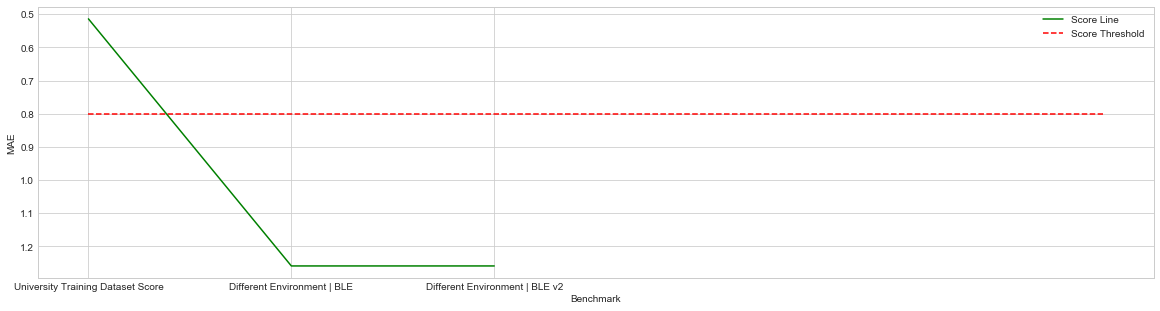

In [51]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','type','Tuning']
types = ['University Training Dataset Score','Different Environment | BLE','Different Environment | BLE v2']
results = pd.DataFrame(data=final_results,columns=statistical_cols)
display(results.sort_values(by=['mae']))
plt.figure(figsize=(20,5))
plt.plot(types,results['mae'],color='green',label='Score Line')
plt.hlines(0.8,0,5,color='red',label='Score Threshold',linestyles='dashed')
plt.xlabel('Benchmark')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.gca().invert_yaxis()
plt.show()